In [108]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import datetime
import seaborn as sns
import numpy as np

In [7]:
faults = pd.read_csv('../data/J1939Faults.csv', index_col = 'RecordID', parse_dates = ['EventTimeStamp', 'LocationTimeStamp']) \
    .drop(columns = ['actionDescription', 'faultValue'])

diagnostics = pd.read_csv('../data/VehicleDiagnosticOnboardData.csv').pivot(index = 'FaultId', columns = 'Name', values = 'Value')

faults_diagnostics = faults.merge(diagnostics, left_on = 'RecordID', right_on = 'FaultId').set_index('EventTimeStamp').sort_index()


C:\Users\Conrad\AppData\Local\Temp\ipykernel_2120\2854992773.py:1: DtypeWarning: Columns (15) have mixed types. Specify dtype option on import or set low_memory=False.
  faults = pd.read_csv('../data/J1939Faults.csv', index_col = 'RecordID', parse_dates = ['EventTimeStamp', 'LocationTimeStamp']) \


In [38]:
faults_diagnostics[faults_diagnostics['EquipmentID'].isin(derate_trucks_list)]['EquipmentID'].unique()


array(['2015', '1849', '1909', '1997', '1961', '1887', '1968', '1873',
       '1965', '1977', '1970', '1869', '1861', '1979', '1989', '1494',
       '1515', '1744', '1886', '1612', '1920', '1587', '1980', '1651',
       '1827', '1576', '1806', '1611', '1597', '1740', '1645', '1877',
       '1776', '1619', '1957', '1943', '1966', '1650', '1899', '1906',
       '1644', '1739', '1856', '1917', '1751', '1452', '2007', '1591',
       '1778', '1662', '1713', '105338352', '1807', '105349576', '1630',
       '1714', '1971', '309', '1632', '1815', '1717', '1999', '1878',
       '1730', '1600', '1736', '1733', '1488', '1439', '310', '1369',
       '1429', '1417', '1582', '1620', '1601', '1590', '1605', '1585',
       '1634', '1586', '1721', '1610', '1395', '1766', '1437', '1646',
       '1595', '1377', '1641', '1365', '1609', '1768', '1657', '1514',
       '1703', '1625', '1565', '1623', '1607', '1370', '1566', '1499',
       '1467', '1688', '1669', '1606', '1683', '1391', '1458', '1559',
      

In [9]:
faults_diagnostics['EventCluster_3H'] = 1
faults_diagnostics['EventCluster_6H'] = 1
faults_diagnostics['EventCluster_12H'] = 1
faults_diagnostics

,ESS_Id,eventDescription,ecuSoftwareVersion,ecuSerialNumber,ecuModel,ecuMake,ecuSource,spn,fmi,active,...,LampStatus,ParkingBrake,ServiceDistance,Speed,SwitchedBatteryVoltage,Throttle,TurboBoostPressure,EventCluster_3H,EventCluster_6H,EventCluster_12H
EventTimeStamp,,,,,,,,,,,,,,,,,,,,,
2000-03-18 19:14:10,108604425,High Voltage (Left Fuel Level Sensor),NaN,NaN,CECU3B-NAMUX4,PACCR,49,829,3,True,...,1279,False,NaN,0,NaN,100,0.58,1,1,1
2000-03-18 19:14:10,108604426,High Voltage (Fuel Level),NaN,NaN,CECU3B-NAMUX4,PACCR,49,96,3,True,...,1279,False,NaN,0,NaN,100,0.58,1,1,1
2000-03-18 19:20:47,108604487,High Voltage (Fuel Level),NaN,NaN,CECU3B-NAMUX4,PACCR,49,96,3,False,...,255,NaN,NaN,NaN,NaN,NaN,NaN,1,1,1
2000-03-18 19:20:47,108604488,High Voltage (Left Fuel Level Sensor),NaN,NaN,CECU3B-NAMUX4,PACCR,49,829,3,False,...,255,NaN,NaN,NaN,NaN,NaN,NaN,1,1,1
2000-03-19 02:59:58,108608408,Not Reporting Data Wheel Sensor ABS Axle 2 Right,AAAI000032*AAAM000038*BB41275 *A82J140721A_9...,5W26153559,EC80ESP,BNDWS,11,792,7,False,...,1279,NaN,NaN,NaN,NaN,NaN,NaN,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020-03-06 14:14:13,123906113,Low (Severity Medium) Engine Coolant Level,04384413*22544852*090619141107*60701756*G1*BGT*,NaN,NaN,NaN,0,111,18,True,...,1023,False,NaN,11.84489,14.1,100,1.74,1,1,1
2020-03-06 14:15:34,123906131,Low (Severity Medium) Engine Coolant Level,04384413*22544852*090619141107*60701756*G1*BGT*,NaN,NaN,NaN,0,111,18,False,...,1023,NaN,NaN,NaN,NaN,NaN,NaN,1,1,1
2026-05-16 14:44:11,87903705,Low Voltage (Catalyst Dosing Unit),unknown,unknown,unknown,unknown,0,3361,4,False,...,1023,NaN,NaN,NaN,NaN,NaN,NaN,1,1,1


In [10]:
rolling_window_3H = faults_diagnostics.groupby('EquipmentID', as_index = False)['EventCluster_3H'].rolling('3H').count()
rolling_window_6H = faults_diagnostics.groupby('EquipmentID', as_index = False)['EventCluster_6H'].rolling('6H').count()
rolling_window_12H = faults_diagnostics.groupby('EquipmentID', as_index = False)['EventCluster_12H'].rolling('12H').count()

In [11]:
rolling_window_3H['EventCluster_3H'] = (rolling_window_3H['EventCluster_3H'].shift() >= rolling_window_3H['EventCluster_3H']).cumsum() + 1
rolling_window_6H['EventCluster_6H'] = (rolling_window_6H['EventCluster_6H'].shift() >= rolling_window_6H['EventCluster_6H']).cumsum() + 1
rolling_window_12H['EventCluster_12H'] = (rolling_window_12H['EventCluster_12H'].shift() >= rolling_window_12H['EventCluster_12H']).cumsum() + 1

In [12]:
faults_diagnostics = faults_diagnostics.drop(columns = ['EventCluster_3H', 'EventCluster_6H', 'EventCluster_12H'])
faults_diagnostics = faults_diagnostics.merge(rolling_window_3H, on = ['EventTimeStamp', 'EquipmentID'])
faults_diagnostics = faults_diagnostics.merge(rolling_window_6H, on = ['EventTimeStamp', 'EquipmentID'])
faults_diagnostics = faults_diagnostics.merge(rolling_window_12H, on = ['EventTimeStamp', 'EquipmentID'])
faults_diagnostics = faults_diagnostics.drop_duplicates()

In [13]:
pd.set_option('display.max_rows', 500)

rolling_window_12H.head(200)


,EquipmentID,EventCluster_12H
EventTimeStamp,,
2015-04-26 06:16:16,301,1
2015-04-28 05:29:21,301,2
2015-05-10 07:11:34,301,3
2015-05-10 07:59:25,301,3
2015-05-11 13:11:20,301,4
2015-05-11 13:50:02,301,4
2015-05-13 08:22:32,301,5
2015-05-13 10:19:19,301,5
2015-05-18 09:34:05,301,6


In [14]:
faults_diagnostics.to_csv('../data/faults_diagnostics.csv')

In [15]:
derate_trucks_list = faults_diagnostics[faults_diagnostics['spn']==1569]['ESS_Id'].drop_duplicates().tolist()

#derate_trucks = derate_trucks.merge(faults_diagnostics)
derate_trucks = faults_diagnostics[faults_diagnostics['ESS_Id'].isin(derate_trucks_list)].reset_index()

# Redone rolling with normalized dates

In [72]:
faults = pd.read_csv('../data/J1939Faults.csv', index_col = 'RecordID', parse_dates = ['EventTimeStamp', 'LocationTimeStamp']) \
    .drop(columns = ['actionDescription', 'faultValue'])

diagnostics = pd.read_csv('../data/VehicleDiagnosticOnboardData.csv').pivot(index = 'FaultId', columns = 'Name', values = 'Value')

faults_diagnostics = faults.merge(diagnostics, left_on = 'RecordID', right_on = 'FaultId').set_index('EventTimeStamp').sort_index().reset_index()


C:\Users\Conrad\AppData\Local\Temp\ipykernel_2120\2533930152.py:1: DtypeWarning: Columns (15) have mixed types. Specify dtype option on import or set low_memory=False.
  faults = pd.read_csv('../data/J1939Faults.csv', index_col = 'RecordID', parse_dates = ['EventTimeStamp', 'LocationTimeStamp']) \


In [73]:
faults_diagnostics['EquipmentID'] = faults_diagnostics['EquipmentID'].astype(str)

In [74]:
derate_trucks_list = faults_diagnostics[faults_diagnostics['spn']==1569]['EquipmentID'].drop_duplicates().tolist()

#derate_trucks = derate_trucks.merge(faults_diagnostics)
derate_trucks = faults_diagnostics[faults_diagnostics['EquipmentID'].isin(derate_trucks_list)]
derate_trucks.dtypes

EventTimeStamp               datetime64[ns]
ESS_Id                                int64
eventDescription                     object
ecuSoftwareVersion                   object
ecuSerialNumber                      object
ecuModel                             object
ecuMake                              object
ecuSource                             int64
spn                                   int64
fmi                                   int64
active                                 bool
activeTransitionCount                 int64
EquipmentID                          object
MCTNumber                             int64
Latitude                            float64
Longitude                           float64
LocationTimeStamp            datetime64[ns]
AcceleratorPedal                     object
BarometricPressure                   object
CruiseControlActive                  object
CruiseControlSetSpeed                object
DistanceLtd                          object
EngineCoolantTemperature        

In [75]:
seven_days = datetime.timedelta(7)

truck_template = derate_trucks[:0]

for i in derate_trucks_list:
    truck = derate_trucks[(derate_trucks['EquipmentID'] == i)]
    first_derate_time = derate_trucks[(derate_trucks['EquipmentID'] == i) & (derate_trucks['spn'] == 1569)].iloc[0]['EventTimeStamp']
    mask = (truck['EventTimeStamp']<= first_derate_time) & (truck['EventTimeStamp']>= first_derate_time - seven_days)
    truck = truck.loc[mask]
    truck['diff'] = truck['EventTimeStamp'] - truck['EventTimeStamp'].shift(-1)
    truck['diff'] = truck['diff'].fillna(pd.Timedelta(seconds=0))
    truck['NewDateID'] = pd.to_datetime('2000-01-1 00:00:00', format='%Y-%m-%d %H:%M:%S')
    truck['NewDateID'] = truck['NewDateID'] + truck['diff']
    truck_template = pd.concat([truck_template, truck], ignore_index=True, sort=False)
                          
    

1878    214
1641    175
1820    170
1564    164
1612    149
       ... 
1947      1
1894      1
1485      1
1793      1
1965      1
Name: EquipmentID, Length: 506, dtype: int64

In [112]:
seven_days = datetime.timedelta(7)

truck_template = derate_trucks[:0]

for i in derate_trucks_list:
    
    truck = derate_trucks[(derate_trucks['EquipmentID'] == i)]
    first_derate_time = derate_trucks[(derate_trucks['EquipmentID'] == i) & (derate_trucks['spn'] == 1569)].iloc[0]['EventTimeStamp']
    mask = (truck['EventTimeStamp']<= first_derate_time) & (truck['EventTimeStamp']>= first_derate_time - seven_days)
    truck = truck.loc[mask]
    truck['diff'] = truck['EventTimeStamp'] - truck['EventTimeStamp'].shift(-1)
    truck['diff'] = truck['diff'].fillna(pd.Timedelta(seconds=0))
    truck_template = pd.concat([truck_template, truck], ignore_index=True, sort=False)
    
                          

In [94]:
seven_days = datetime.timedelta(7)
test_truck = derate_trucks[(derate_trucks['EquipmentID'] == '1878')]
test = derate_trucks[(derate_trucks['EquipmentID'] == '1878') & (derate_trucks['spn'] == 1569)].iloc[0]['EventTimeStamp']
mask = (test_truck['EventTimeStamp']<= test) & (test_truck['EventTimeStamp']>= test - seven_days)
test_truck = test_truck.loc[mask]
test_truck['diff'] = test_truck['EventTimeStamp'] - test_truck['EventTimeStamp'].shift(-1)
test_truck[test_truck['spn']==1761]

,EventTimeStamp,ESS_Id,eventDescription,ecuSoftwareVersion,ecuSerialNumber,ecuModel,ecuMake,ecuSource,spn,fmi,...,IgnStatus,IntakeManifoldTemperature,LampStatus,ParkingBrake,ServiceDistance,Speed,SwitchedBatteryVoltage,Throttle,TurboBoostPressure,diff
567659,2016-09-12 03:41:24,11531635,Data May Be Invalid Catalyst Tank Level,NaN,NaN,CECU3B-NAMUX4,PACCR,49,1761,19,...,NaN,NaN,255,NaN,NaN,NaN,NaN,NaN,NaN,0 days 00:00:00
567660,2016-09-12 03:41:24,11531636,Error in System Catalyst Tank Level,04358814*06025864*100515184137*09400147*G1*BDR*,79903648,6X1u13D1500000000,CMMNS,0,1761,11,...,NaN,NaN,1023,NaN,NaN,NaN,NaN,NaN,NaN,-1 days +23:35:12
567667,2016-09-12 04:06:41,11531806,Data May Be Invalid Catalyst Tank Level,NaN,NaN,CECU3B-NAMUX4,PACCR,49,1761,19,...,True,109.4,255,False,NaN,48.06889,NaN,100,29.29,-1 days +23:59:59
567668,2016-09-12 04:06:42,11531807,Error in System Catalyst Tank Level,04358814*06025864*100515184137*09400147*G1*BDR*,79903648,6X1u13D1500000000,CMMNS,0,1761,11,...,True,111.2,2047,False,NaN,49.0689,NaN,100,29.29,-1 days +22:57:16
567699,2016-09-12 05:09:51,11532363,Error in System Catalyst Tank Level,04358814*06025864*100515184137*09400147*G1*BDR*,79903648,6X1u13D1500000000,CMMNS,0,1761,11,...,NaN,NaN,1023,NaN,NaN,NaN,NaN,NaN,NaN,-1 days +23:59:59
567700,2016-09-12 05:09:52,11532364,Data May Be Invalid Catalyst Tank Level,NaN,NaN,CECU3B-NAMUX4,PACCR,49,1761,19,...,NaN,NaN,255,NaN,NaN,NaN,NaN,NaN,NaN,-1 days +23:53:29
567754,2016-09-12 06:14:36,11533412,Error in System Catalyst Tank Level,04358814*06025864*100515184137*09400147*G1*BDR*,79903648,6X1u13D1500000000,CMMNS,0,1761,11,...,True,127.4,2047,False,NaN,2.301015,NaN,100,2.03,-1 days +23:59:59
567755,2016-09-12 06:14:37,11533413,Data May Be Invalid Catalyst Tank Level,NaN,NaN,CECU3B-NAMUX4,PACCR,49,1761,19,...,True,127.4,255,False,NaN,2.339851,NaN,100,2.03,-1 days +23:46:57
567774,2016-09-12 06:28:05,11533437,Error in System Catalyst Tank Level,04358814*06025864*100515184137*09400147*G1*BDR*,79903648,6X1u13D1500000000,CMMNS,0,1761,11,...,NaN,NaN,1023,NaN,NaN,NaN,NaN,NaN,NaN,-1 days +23:59:59
567775,2016-09-12 06:28:06,11533438,Data May Be Invalid Catalyst Tank Level,NaN,NaN,CECU3B-NAMUX4,PACCR,49,1761,19,...,NaN,NaN,255,NaN,NaN,NaN,NaN,NaN,NaN,-1 days +23:58:59


In [113]:
original_time_pd_truck = truck_template.set_index('EventTimeStamp').sort_index()

original_time_pd_truck['EventCluster_3H'] = 1
original_time_pd_truck['EventCluster_6H'] = 1
original_time_pd_truck['EventCluster_12H'] = 1
original_time_pd_truck

rolling_window_3H = original_time_pd_truck.groupby('EquipmentID', as_index = False)['EventCluster_3H'].rolling('3H').count()
rolling_window_6H = original_time_pd_truck.groupby('EquipmentID', as_index = False)['EventCluster_6H'].rolling('6H').count()
rolling_window_12H = original_time_pd_truck.groupby('EquipmentID', as_index = False)['EventCluster_12H'].rolling('12H').count()
    
rolling_window_3H['EventCluster_3H'] = (rolling_window_3H['EventCluster_3H'].shift() >= rolling_window_3H['EventCluster_3H']).cumsum() + 1
rolling_window_6H['EventCluster_6H'] = (rolling_window_6H['EventCluster_6H'].shift() >= rolling_window_6H['EventCluster_6H']).cumsum() + 1
rolling_window_12H['EventCluster_12H'] = (rolling_window_12H['EventCluster_12H'].shift() >= rolling_window_12H['EventCluster_12H']).cumsum() + 1
    
original_time_pd_truck = original_time_pd_truck.drop(columns = ['EventCluster_3H', 'EventCluster_6H', 'EventCluster_12H'])
original_time_pd_truck = original_time_pd_truck.merge(rolling_window_3H, on = ['EventTimeStamp', 'EquipmentID'])
original_time_pd_truck = original_time_pd_truck.merge(rolling_window_6H, on = ['EventTimeStamp', 'EquipmentID'])
original_time_pd_truck = original_time_pd_truck.merge(rolling_window_12H, on = ['EventTimeStamp', 'EquipmentID'])
original_time_pd_truck = original_time_pd_truck.drop_duplicates()

In [126]:
test_timed = original_time_pd_truck
test_timed['diff'] = (test_timed['diff']/np.timedelta64(1, 's')).astype(float)


UFuncTypeError: ufunc 'true_divide' cannot use operands with types dtype('float64') and dtype('<m8[ns]')

In [129]:
test_timed['diff'] = test_timed['diff'].abs()

array([[<AxesSubplot:title={'center':'log_diff'}>]], dtype=object)

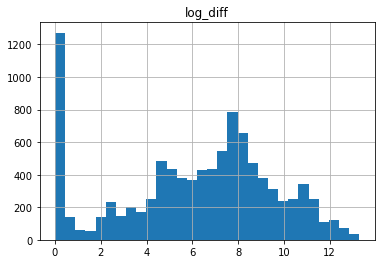

In [144]:
test_timed['log_diff'] = np.log(test_timed['diff']+1)
test_timed.hist('log_diff', bins = 30)

In [149]:
test_timed[test_timed['log_diff'].between(7, 8)].describe()

,ESS_Id,ecuSource,spn,fmi,activeTransitionCount,MCTNumber,Latitude,Longitude,diff,EventCluster_3H,EventCluster_6H,EventCluster_12H,log_diff
count,1.448000e+03,1448.000000,1448.000000,1448.000000,1448.000000,1.448000e+03,1448.000000,1448.000000,1448.000000,1448.000000,1448.000000,1448.000000,1448.000000
mean,1.211948e+07,12.829420,1353.603591,13.088398,50.679558,1.053963e+08,36.952687,-83.980996,1981.308702,1578.754144,1247.884669,938.946823,7.556154
std,1.457268e+07,21.184171,14314.646861,6.180239,60.351283,3.864790e+04,2.808285,4.104111,514.215540,893.374044,699.170841,515.595201,0.272932
min,1.046694e+06,0.000000,27.000000,0.000000,0.000000,1.053047e+08,26.278148,-98.586388,1096.000000,24.000000,20.000000,18.000000,7.000334
25%,5.482703e+06,0.000000,111.000000,9.000000,1.000000,1.053564e+08,35.587916,-86.443460,1526.000000,910.000000,745.250000,589.500000,7.331060
50%,8.351962e+06,0.000000,111.000000,17.000000,1.000000,1.054111e+08,36.539351,-84.760393,2007.000000,1440.500000,1118.000000,831.000000,7.604894
75%,1.174288e+07,49.000000,929.000000,17.000000,126.000000,1.054208e+08,39.195752,-81.215104,2395.000000,2214.250000,1737.250000,1276.250000,7.781556
max,1.112827e+08,49.000000,523531.000000,31.000000,127.000000,1.054657e+08,44.988194,-71.195972,2976.000000,3453.000000,2725.000000,2073.000000,7.998671


In [47]:
preceeding_error = original_time_pd_truck[:0]

for i in derate_trucks_list:
    try:
        pe = original_time_pd_truck[original_time_pd_truck['EquipmentID'] == i][-4:-1]
    except:
        pass
    preceeding_error = pd.concat([preceeding_error, pe], ignore_index=True, sort=False)

In [48]:
preceeding_error[['spn', 'fmi']].value_counts()

spn     fmi
111     17     138
3362    31      92
3251    2       70
929     9       45
3216    4       42
1761    17      39
        18      37
596     31      34
50353   0       30
411     2       26
639     2       22
1569    31      20
4094    31      18
102     2       18
829     3       17
641     7       17
111     18      17
3360    9       16
3226    20      15
641     9       14
96      3       13
102     18      13
1761    9       12
3226    9       12
5394    5       12
3364    9       11
4364    18      11
5394    7       10
3226    4       10
3058    16       9
4340    5        9
1761    19       9
3610    2        8
1209    4        8
157     18       8
3703    31       8
4342    5        8
1209    2        7
4794    31       7
2863    2        6
3363    5        6
6802    31       6
1761    1        6
3251    16       6
641     11       6
3364    10       6
4339    7        5
3216    9        5
3363    16       5
27      4        5
3031    18       5
        9        5


In [31]:
faults = [3362,3251,111,1761]

preceeding_error[preceeding_error['spn'].isin(faults)].pivot_table(values='diff', index='spn')

,diff
spn,
111,-1 days +19:27:13.756756757
1761,-1 days +23:34:07.586956522
3251,-1 days +12:07:01.075000
3362,-1 days +22:51:46.156626507


In [36]:
preceeding_error[preceeding_error['spn'].isin(faults)].pivot(index='EquipmentID', columns='spn', values='diff').describe()

spn,111,1761,3251,3362
count,37,46,40,83
mean,-1 days +19:27:13.756756757,-1 days +23:34:07.586956522,-1 days +12:07:01.075000,-1 days +22:51:46.156626507
std,0 days 09:49:16.822676822,0 days 02:04:29.078561572,0 days 17:11:02.399639011,0 days 01:15:10.248480207
min,-2 days +05:07:40,-1 days +10:03:53,-3 days +00:18:08,-1 days +13:07:33
25%,-1 days +21:08:50,-1 days +23:59:58.250000,-1 days +08:27:14.750000,-1 days +22:59:59
50%,-1 days +23:07:42,-1 days +23:59:59,-1 days +19:57:18,-1 days +23:00:00
75%,-1 days +23:42:45,-1 days +23:59:59,-1 days +22:16:41.500000,-1 days +23:00:01
max,-1 days +23:58:25,0 days 00:00:00,-1 days +23:59:59,-1 days +23:56:40


In [327]:
truck_template = truck_template.sort_index()
truck_template['NewDateID'] = pd.to_datetime('2000-01-1 01:00:00', format='%Y-%m-%d %H:%M:%S')
truck_template['NewDateID'] = truck_template['NewDateID'] + truck_template['diff']   

truck_template['EventCluster_3H'] = 1
truck_template['EventCluster_6H'] = 1
truck_template['EventCluster_12H'] = 1
    
rolling_window_3H = truck_template.groupby('EquipmentID', as_index = False)['EventCluster_3H'].rolling('3H').count()
rolling_window_6H = truck_template.groupby('EquipmentID', as_index = False)['EventCluster_6H'].rolling('6H').count()
rolling_window_12H = truck_template.groupby('EquipmentID', as_index = False)['EventCluster_12H'].rolling('12H').count()
    
rolling_window_3H['EventCluster_3H'] = (rolling_window_3H['EventCluster_3H'].shift() >= rolling_window_3H['EventCluster_3H']).cumsum() + 1
rolling_window_6H['EventCluster_6H'] = (rolling_window_6H['EventCluster_6H'].shift() >= rolling_window_6H['EventCluster_6H']).cumsum() + 1
rolling_window_12H['EventCluster_12H'] = (rolling_window_12H['EventCluster_12H'].shift() >= rolling_window_12H['EventCluster_12H']).cumsum() + 1
    
truck_template = truck_template.drop(columns = ['EventCluster_3H', 'EventCluster_6H', 'EventCluster_12H'])
truck_template = truck_template.merge(rolling_window_3H, on = ['EventTimeStamp', 'EquipmentID'])
truck_template = truck_template.merge(rolling_window_6H, on = ['EventTimeStamp', 'EquipmentID'])
truck_template = truck_template.merge(rolling_window_12H, on = ['EventTimeStamp', 'EquipmentID'])
truck_template = truck_template.drop_duplicates()
    
truck_template = truck_template.reset_index()
    
    
truck_template

,EventTimeStamp,ESS_Id,eventDescription,ecuSoftwareVersion,ecuSerialNumber,ecuModel,ecuMake,ecuSource,spn,fmi,...,ServiceDistance,Speed,SwitchedBatteryVoltage,Throttle,TurboBoostPressure,diff,NewDateID,EventCluster_3H,EventCluster_6H,EventCluster_12H
0,2000-03-19 13:02:36,108639840,Condition Exists Catalyst Dosing Unit Input Lines,04358814*06086133*051718174436*09401683*G1*BDR*,79923861,6X1u13D1500000000,CMMNS,0,3362,31,...,NaN,65.25368,NaN,100,25.81,-1 days +23:00:02,2000-01-01 00:00:02,3323,2616,1977
1,2000-03-19 14:02:34,108644439,Condition Exists Engine Protection Torque Derate,04358814*06086133*051718174436*09401683*G1*BDR*,79923861,6X1u13D1500000000,CMMNS,0,1569,31,...,NaN,62.4381,NaN,100,25.81,0 days 00:00:00,2000-01-01 01:00:00,3323,2616,1977
2,2011-01-01 00:03:29,13908742,NaN,04358814*06088094*061516161145*09401661*G1*BDR*,79909430,6X1u13D1500000000,CMMNS,0,5394,5,...,NaN,0,NaN,100,0.29,-1 days +23:57:31,2000-01-01 00:57:31,3186,2505,1876
3,2011-01-01 00:03:34,77308356,Condition Exists Engine Protection Torque Derate,05317106*04101156*020516150530*09400053*G1*BDR*,79743733,6X1u13D1500000000,CMMNS,0,1569,31,...,NaN,9.689507,NaN,100,1.45,0 days 00:00:00,2000-01-01 01:00:00,2495,1969,1479
4,2011-01-01 00:03:34,77308358,NaN,05317106*04101156*020516150530*09400053*G1*BDR*,79743733,6X1u13D1500000000,CMMNS,0,5246,0,...,NaN,9.689507,NaN,100,1.45,0 days 00:00:00,2000-01-01 01:00:00,2495,1969,1479
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9769,2020-01-09 13:23:38,116364731,High Voltage (Fuel Level),NaN,NaN,CECU3B-NAMUX4,PACCR,49,96,3,...,NaN,NaN,NaN,NaN,NaN,-1 days +15:59:45,1999-12-31 16:59:45,2945,2325,1731
9770,2020-01-09 21:23:53,116419454,Abnormal Frequency J1939 Network #2,NaN,NaN,CECU3B-NAMUX4,PACCR,49,1231,8,...,NaN,0,NaN,100,0,-1 days +23:56:52,2000-01-01 00:56:52,2946,2326,1731
9771,2020-01-09 21:27:01,116419520,Abnormal Frequency J1939 Network #2,NaN,NaN,CECU3B-NAMUX4,PACCR,49,1231,8,...,NaN,NaN,NaN,NaN,NaN,-2 days +12:46:00,1999-12-30 13:46:00,2946,2326,1731
9772,2020-01-11 08:41:01,116585401,Low Voltage (Catalyst Dosing Unit),04358814*06011740*051718174436*09401683*G1*BDR*,79897853,6X1u13D1500000000,CMMNS,0,3361,4,...,NaN,70.12756,NaN,100,10.44,-1 days +22:27:39,1999-12-31 23:27:39,2947,2327,1732


KeyboardInterrupt: 

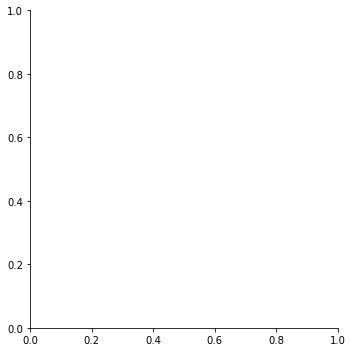

In [328]:
#plt.plot(truck_template['NewDateID'], truck_template['EventCluster_3H'])
sns.catplot(data = truck_template, x='NewDateID', y='EventCluster_3H', hue='EquipmentID')

In [269]:
partial_derate_reset = truck_template.drop(columns='diff')
partial_derate_reset = partial_derate_reset.set_index('NewDateID')

In [270]:

truck_template.shape

(9775, 43)

In [271]:
partial_derate_reset['EventCluster_3H'] = 1
partial_derate_reset['EventCluster_6H'] = 1
partial_derate_reset['EventCluster_12H'] = 1
partial_derate_reset

,EventTimeStamp,ESS_Id,eventDescription,ecuSoftwareVersion,ecuSerialNumber,ecuModel,ecuMake,ecuSource,spn,fmi,...,LampStatus,ParkingBrake,ServiceDistance,Speed,SwitchedBatteryVoltage,Throttle,TurboBoostPressure,EventCluster_3H,EventCluster_6H,EventCluster_12H
NewDateID,,,,,,,,,,,,,,,,,,,,,
1999-12-31 23:00:02,2000-03-19 13:02:36,108639840,Condition Exists Catalyst Dosing Unit Input Lines,04358814*06086133*051718174436*09401683*G1*BDR*,79923861,6X1u13D1500000000,CMMNS,0,3362,31,...,17407,False,NaN,65.25368,NaN,100,25.81,1,1,1
2000-01-01 00:00:00,2000-03-19 14:02:34,108644439,Condition Exists Engine Protection Torque Derate,04358814*06086133*051718174436*09401683*G1*BDR*,79923861,6X1u13D1500000000,CMMNS,0,1569,31,...,18431,False,NaN,62.4381,NaN,100,25.81,1,1,1
2000-01-01 00:00:00,2011-01-01 00:03:34,77308356,Condition Exists Engine Protection Torque Derate,05317106*04101156*020516150530*09400053*G1*BDR*,79743733,6X1u13D1500000000,CMMNS,0,1569,31,...,22527,False,NaN,9.689507,NaN,100,1.45,1,1,1
2000-01-01 00:00:00,2011-01-01 00:03:34,77308358,NaN,05317106*04101156*020516150530*09400053*G1*BDR*,79743733,6X1u13D1500000000,CMMNS,0,5246,0,...,22527,False,NaN,9.689507,NaN,100,1.45,1,1,1
1999-12-31 23:57:31,2011-01-01 00:03:29,13908742,NaN,04358814*06088094*061516161145*09401661*G1*BDR*,79909430,6X1u13D1500000000,CMMNS,0,5394,5,...,17407,True,NaN,0,NaN,100,0.29,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1999-12-31 15:59:45,2020-01-09 13:23:38,116364731,High Voltage (Fuel Level),NaN,NaN,CECU3B-NAMUX4,PACCR,49,96,3,...,255,NaN,NaN,NaN,NaN,NaN,NaN,1,1,1
1999-12-31 23:56:52,2020-01-09 21:23:53,116419454,Abnormal Frequency J1939 Network #2,NaN,NaN,CECU3B-NAMUX4,PACCR,49,1231,8,...,255,True,NaN,0,NaN,100,0,1,1,1
1999-12-30 12:46:00,2020-01-09 21:27:01,116419520,Abnormal Frequency J1939 Network #2,NaN,NaN,CECU3B-NAMUX4,PACCR,49,1231,8,...,255,NaN,NaN,NaN,NaN,NaN,NaN,1,1,1


In [280]:
test = partial_derate_reset.reset_index().reset_index().rename(columns={'index':'ID'}).set_index('ID')
test

,NewDateID,EventTimeStamp,ESS_Id,eventDescription,ecuSoftwareVersion,ecuSerialNumber,ecuModel,ecuMake,ecuSource,spn,...,LampStatus,ParkingBrake,ServiceDistance,Speed,SwitchedBatteryVoltage,Throttle,TurboBoostPressure,EventCluster_3H,EventCluster_6H,EventCluster_12H
ID,,,,,,,,,,,,,,,,,,,,,
0,1999-12-31 23:00:02,2000-03-19 13:02:36,108639840,Condition Exists Catalyst Dosing Unit Input Lines,04358814*06086133*051718174436*09401683*G1*BDR*,79923861,6X1u13D1500000000,CMMNS,0,3362,...,17407,False,NaN,65.25368,NaN,100,25.81,1,1,1
1,2000-01-01 00:00:00,2000-03-19 14:02:34,108644439,Condition Exists Engine Protection Torque Derate,04358814*06086133*051718174436*09401683*G1*BDR*,79923861,6X1u13D1500000000,CMMNS,0,1569,...,18431,False,NaN,62.4381,NaN,100,25.81,1,1,1
2,2000-01-01 00:00:00,2011-01-01 00:03:34,77308356,Condition Exists Engine Protection Torque Derate,05317106*04101156*020516150530*09400053*G1*BDR*,79743733,6X1u13D1500000000,CMMNS,0,1569,...,22527,False,NaN,9.689507,NaN,100,1.45,1,1,1
3,2000-01-01 00:00:00,2011-01-01 00:03:34,77308358,NaN,05317106*04101156*020516150530*09400053*G1*BDR*,79743733,6X1u13D1500000000,CMMNS,0,5246,...,22527,False,NaN,9.689507,NaN,100,1.45,1,1,1
4,1999-12-31 23:57:31,2011-01-01 00:03:29,13908742,NaN,04358814*06088094*061516161145*09401661*G1*BDR*,79909430,6X1u13D1500000000,CMMNS,0,5394,...,17407,True,NaN,0,NaN,100,0.29,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9770,1999-12-31 15:59:45,2020-01-09 13:23:38,116364731,High Voltage (Fuel Level),NaN,NaN,CECU3B-NAMUX4,PACCR,49,96,...,255,NaN,NaN,NaN,NaN,NaN,NaN,1,1,1
9771,1999-12-31 23:56:52,2020-01-09 21:23:53,116419454,Abnormal Frequency J1939 Network #2,NaN,NaN,CECU3B-NAMUX4,PACCR,49,1231,...,255,True,NaN,0,NaN,100,0,1,1,1
9772,1999-12-30 12:46:00,2020-01-09 21:27:01,116419520,Abnormal Frequency J1939 Network #2,NaN,NaN,CECU3B-NAMUX4,PACCR,49,1231,...,255,NaN,NaN,NaN,NaN,NaN,NaN,1,1,1


In [284]:
partial_derate_reset.sort_index().groupby('EquipmentID', as_index = False)['EventCluster_3H'].rolling('3H').count()

,EquipmentID,EventCluster_3H
NewDateID,,
2000-01-01 00:00:00,105338352,1.0
2000-01-01 00:00:00,105338352,2.0
1999-12-30 22:15:15,105344451,1.0
1999-12-31 01:37:04,105344451,1.0
1999-12-31 06:08:54,105344451,1.0
...,...,...
1999-12-31 23:23:01,309,3.0
1999-12-31 23:53:35,309,4.0
2000-01-01 00:00:00,309,5.0


In [261]:
rolling_window_3H = partial_derate_reset.sort_index().groupby('EquipmentID', as_index = False)['EventCluster_3H'].rolling('3H').count().reset_index().reset_index()
rolling_window_6H = partial_derate_reset.sort_index().groupby('EquipmentID', as_index = False)['EventCluster_6H'].rolling('6H').count()reset_index().reset_index()
rolling_window_12H = partial_derate_reset.sort_index().groupby('EquipmentID', as_index = False)['EventCluster_12H'].rolling('12H').count()reset_index().reset_index()

In [262]:
partial_derate_reset = partial_derate_reset.drop(columns = ['EventCluster_3H', 'EventCluster_6H', 'EventCluster_12H'])
partial_derate_reset = partial_derate_reset.merge(rolling_window_3H, on = ['NewDateID', 'EquipmentID'])
partial_derate_reset = partial_derate_reset.merge(rolling_window_6H, on = ['NewDateID', 'EquipmentID'])
partial_derate_reset = partial_derate_reset.merge(rolling_window_12H, on = ['NewDateID', 'EquipmentID'])
partial_derate_reset = partial_derate_reset.drop_duplicates()

In [265]:
partial_derate_reset = partial_derate_reset.reset_index()

,NewDateID,EventTimeStamp,ESS_Id,eventDescription,ecuSoftwareVersion,ecuSerialNumber,ecuModel,ecuMake,ecuSource,spn,...,LampStatus,ParkingBrake,ServiceDistance,Speed,SwitchedBatteryVoltage,Throttle,TurboBoostPressure,EventCluster_3H,EventCluster_6H,EventCluster_12H
0,1999-12-31 23:00:02,2000-03-19 13:02:36,108639840,Condition Exists Catalyst Dosing Unit Input Lines,04358814*06086133*051718174436*09401683*G1*BDR*,79923861,6X1u13D1500000000,CMMNS,0,3362,...,17407,False,NaN,65.25368,NaN,100,25.81,1.0,1.0,1.0
1,2000-01-01 00:00:00,2000-03-19 14:02:34,108644439,Condition Exists Engine Protection Torque Derate,04358814*06086133*051718174436*09401683*G1*BDR*,79923861,6X1u13D1500000000,CMMNS,0,1569,...,18431,False,NaN,62.4381,NaN,100,25.81,2.0,2.0,2.0
2,2000-01-01 00:00:00,2011-01-01 00:03:34,77308356,Condition Exists Engine Protection Torque Derate,05317106*04101156*020516150530*09400053*G1*BDR*,79743733,6X1u13D1500000000,CMMNS,0,1569,...,22527,False,NaN,9.689507,NaN,100,1.45,1.0,1.0,1.0
3,2000-01-01 00:00:00,2011-01-01 00:03:34,77308356,Condition Exists Engine Protection Torque Derate,05317106*04101156*020516150530*09400053*G1*BDR*,79743733,6X1u13D1500000000,CMMNS,0,1569,...,22527,False,NaN,9.689507,NaN,100,1.45,1.0,1.0,2.0
4,2000-01-01 00:00:00,2011-01-01 00:03:34,77308356,Condition Exists Engine Protection Torque Derate,05317106*04101156*020516150530*09400053*G1*BDR*,79743733,6X1u13D1500000000,CMMNS,0,1569,...,22527,False,NaN,9.689507,NaN,100,1.45,1.0,2.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14464463,1999-12-31 23:44:14,2020-01-09 13:07:52,116360654,High Voltage (Left Fuel Level Sensor),NaN,NaN,CECU3B-NAMUX4,PACCR,49,829,...,1279,True,NaN,0,NaN,100,0.58,2.0,2.0,3.0
14464464,1999-12-31 15:59:45,2020-01-09 13:23:38,116364731,High Voltage (Fuel Level),NaN,NaN,CECU3B-NAMUX4,PACCR,49,96,...,255,NaN,NaN,NaN,NaN,NaN,NaN,1.0,1.0,1.0
14464465,1999-12-31 23:56:52,2020-01-09 21:23:53,116419454,Abnormal Frequency J1939 Network #2,NaN,NaN,CECU3B-NAMUX4,PACCR,49,1231,...,255,True,NaN,0,NaN,100,0,3.0,3.0,4.0
14464466,1999-12-30 12:46:00,2020-01-09 21:27:01,116419520,Abnormal Frequency J1939 Network #2,NaN,NaN,CECU3B-NAMUX4,PACCR,49,1231,...,255,NaN,NaN,NaN,NaN,NaN,NaN,1.0,1.0,1.0
